<a href="https://colab.research.google.com/github/payaljain2003/fastai/blob/main/europe_city_identification/italy_copenhagen_malta_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Bird and Fish images

In [24]:
!pip install -Uqq duckduckgo_search

In [25]:

from duckduckgo_search import ddg_images
from fastcore.all import *

In [26]:
def search_images(term, max_images=200):
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [27]:
urls = search_images('italy photos', max_images=1)
urls[0]


'https://www.italiamia.com/wp-content/uploads/2016/01/Castel-Santangelo-Mausoleum-of-Hadrian-Parco-Adriano-Rome-Italy-Top-tourist-attractions-Of-Italy.jpg'

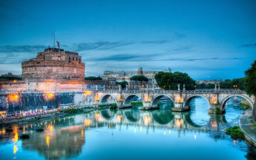

In [28]:
from fastdownload import download_url
dest = 'italy.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)



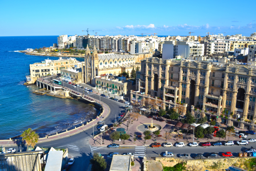

In [29]:
download_url(search_images('malta photos', max_images=1)[0], 'malta.jpg', show_progress=False)
Image.open('malta.jpg').to_thumb(256,256)

In [30]:
searches = 'italy','copenhagen', 'malta'
path = Path('Europe_tour')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} day photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} night photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

In [32]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [33]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

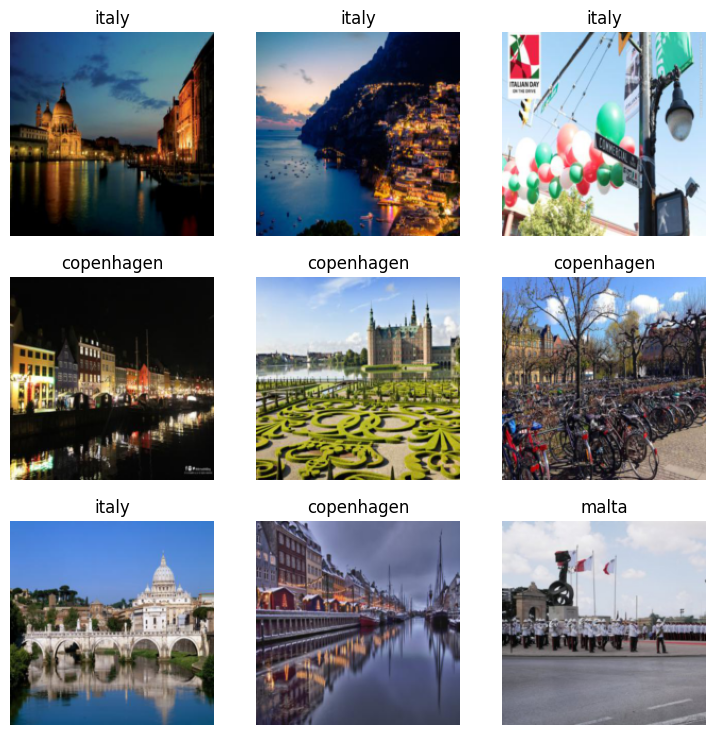

In [34]:
dls.show_batch(max_n=9)

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.666336,0.860681,0.322368,01:32


epoch,train_loss,valid_loss,error_rate,time
0,0.869777,0.724627,0.289474,02:12
1,0.566093,0.617458,0.223684,02:18
2,0.392930,0.590219,0.210526,02:12


In [40]:
file_path = "/content/IMG_9943.JPG"

#_,_,probs = learn.predict(PILImage.create(file_path))

obj, _, probs= learn.predict(PILImage.create(file_path))
predicted_label = obj
probs = probs
print("Predicted label:", predicted_label)
print("Probabilities:", [f"{p:.4f}" for p in probs])

Predicted label: italy
Probabilities: ['0.1358', '0.8599', '0.0043']


In [42]:
import zipfile
import os


# Replace 'zip_file_path' with the path to the uploaded zipped folder
zip_file_path = "/content/test.zip"


# Extract the contents of the zipped folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

print("Extraction completed.")

Extraction completed.


In [44]:
images_path = "/content/test"


# Get a list of image file paths
image_files = get_image_files(images_path)

# Create new folders for each city/country
os.makedirs(images_path + "/italy", exist_ok=True)
os.makedirs(images_path + "/malta", exist_ok=True)
os.makedirs(images_path + "/copenhagen", exist_ok=True)

# Loop through each image file and make predictions
for image_file in image_files:
    # Load and preprocess the image
    img = PILImage.create(image_file)

    # Make a prediction using the model
    obj, _, probs= learn.predict(PILImage.create(image_file))
    #pred, _ = learn.get_preds(dl=[(img,)])
    #pred_label = learn.dls.vocab[pred.argmax()]
    pred_label = obj

    # Move the image file to the corresponding folder
    if pred_label == "italy":
        os.rename(image_file, os.path.join(images_path, "italy", os.path.basename(image_file)))
    elif pred_label == "malta":
        os.rename(image_file, os.path.join(images_path, "malta", os.path.basename(image_file)))
    elif pred_label == "copenhagen":
        os.rename(image_file, os.path.join(images_path, "copenhagen", os.path.basename(image_file)))

print("Images segregation completed.")


Images segregation completed.


In [45]:
import shutil

# Replace 'folder_path' with the path to the folder you want to download
folder_path = "/content/test"

# Replace 'zip_file_path' with the path where you want to save the zipped file
zip_file_path = "/content/predicted_test"

shutil.make_archive(zip_file_path, 'zip', folder_path)

'/content/predicted_test.zip'

In [46]:
%timeit [i+1 for i in range(1000)]


70.4 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
